<font size="5">**DSCI 100: Predicting the Quality of Wine**</font>  
**By Project Group 25 (Natalia Garcia-Arias, Marta Halasz, Kevin Meng, and Sara Trnovska)**

<font size="3">**Introduction**</font>

Drinking wine is an enjoyable pastime that many indulge in. To ensure customer satisfaction, it is of utmost importance for wine manufacturers to check the quality of their wine. Wine certification is normally done with the help of physicochemical tests revealing the wine’s physicochemical composition and sensory tests showing subjective assessments of wine quality (Nebot, Mugica, & Escobet, 2015). An efficient prediction model based physicochemical variables that have a strong relationship with wine quality would greatly facilitate the certification process by eliminating the need for taste testers. The wine data used in this project was collected from May 2004 to February 2007 for red and white variants of the Portuguese Vinho Verde wine by the University of Minho in Guimaraes, Portugal and was taken from the UCI Machine Learning Repository (Cortez et al., 2009). The data consists of results of physicochemical tests of wine samples as well as sensory assessments of the wine quality by taste testers who graded the quality of the wine on a scale of one to ten. A list of all of the variables in the dataset is shown below (Nebot, Mugica, & Escobet, 2015):
* Fixed acidity (g(tartaric acid)/dm<sup>3</sup>)
* Volatile acidity (g(acetic acid)/dm<sup>3</sup>)
* Citric acid (g/dm<sup>3</sup>)
* Residual sugar (g/dm<sup>3</sup>)
* Chlorides (g(sodium chloride)/dm<sup>3</sup>)
* Free sulfur dioxide (mg/dm<sup>3</sup>)
* Total sulfur dioxide (mg/dm<sup>3</sup>)
* Density (g/dm<sup>3</sup>)
* pH
* Sulfates (g(potassium sulfate)/dm<sup>3</sup>)
* Alcohol (%vol)
* Quality

Alcohol changes what people taste when they consume wine, thus likely affecting their subjective ratings of wine. While it does not trigger receptors on the tongue, it “carries the aroma of wine to your senses" (Wiens, 2017). Density is primarily reflective of the concentration of dissolved solids and maybe be associated with the texture of the wine, which would also be detectable by the senses and thus potentially affect the perceived quality of wine (ETS Laboratories, n.d.). Knowing this as well as the physicochemical composition of the wine samples and the sensory assessment of the samples, our project aims to answer the following question: how do alcohol and density predict the perceived quality of the wine? 

<font size="3">**Preliminary Exploratory Data Analysis**</font>

First, we loaded all of the packages needed for our preliminary data analysis (tidyverse, repr, tidymodels, and cowplot).

In [1]:
#loading packages
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Next, we loaded the data for red and white wine into R using the read_delim function, assigned column names to all of the columns in the dataset, and combined the data into one dataframe.

In [2]:
#read red wine data, assign wine-type label and new column names
red_wine_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delim = ";") %>%
                    mutate(quality = quality)%>%
                    mutate(wine_type = as.factor("red"))%>%
                    setNames (c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality", "wine_type"))

#read white wine data, assign wine-type label and new column names
white_wine_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delim = ";") %>%
                    mutate(quality = quality)%>%
                    mutate(wine_type = as.factor("white"))%>%
                    setNames (c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality", "wine_type"))

#combine both wine types into one dataframe
wine_data <- rbind(red_wine_data, white_wine_data)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



Next, we split the dataset into our training and testing data. Typically, a training set is between 50-95% of the data and a testing set is between 5-50% of the data (Timbers et al., 2021). This is for the purpose of being able to train an accurate model and obtain an accurate evaluation of the performance of the model. 75% is therefore an appropriate proportion of the data for the training data set because it's large enough to build an accurate model while still leaving enough data (25%) to get an accurate evaluation of the model's performance.

In [3]:
#split dataset into training and testing data
set.seed(2547)
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

We used the glimpse() function to view our data.

In [4]:
#glimpse into the dataset
glimpse(wine_training)

Rows: 4,873
Columns: 13
$ fixed_acidity        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.…
$ volatile_acidity     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600,…
$ citric_acid          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, …
$ residual_sugar       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1…
$ chlorides            <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069,…
$ free_sulfur_dioxide  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, 1…
$ total_sulfur_dioxide <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 102…
$ density              <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978, …
$ pH                   <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39, …
$ sulphates            <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47, …
$ alcohol              <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 10…
$ quality              <dbl> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 7, …
$ wine_type            <fct>

**Table 1: Glimpse Into Wine Training Set**

From this, we can see some of the typical values that our chosen variables (wine quality, density, and alcohol) have. 

We then found the number of observations per class.

In [5]:
#summarizes the number of observations per class
num_obs <- nrow(wine_training)

wine_training %>%
  group_by(quality) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

`summarise()` ungrouping output (override with `.groups` argument)



quality,count,percentage
<dbl>,<int>,<dbl>
3,25,0.51303099
4,161,3.30391956
5,1602,32.87502565
6,2127,43.64867638
7,810,16.62220398
8,144,2.95505849
9,4,0.08208496


**Table 2: Number of Observations Per Class for the Quality Variable**

We can see that most wines are of medium quality (5-6). As the quality gets lower and/or higher than these values, the number of observations decreases. 

We created a histogram for wine quality to show its distribution.

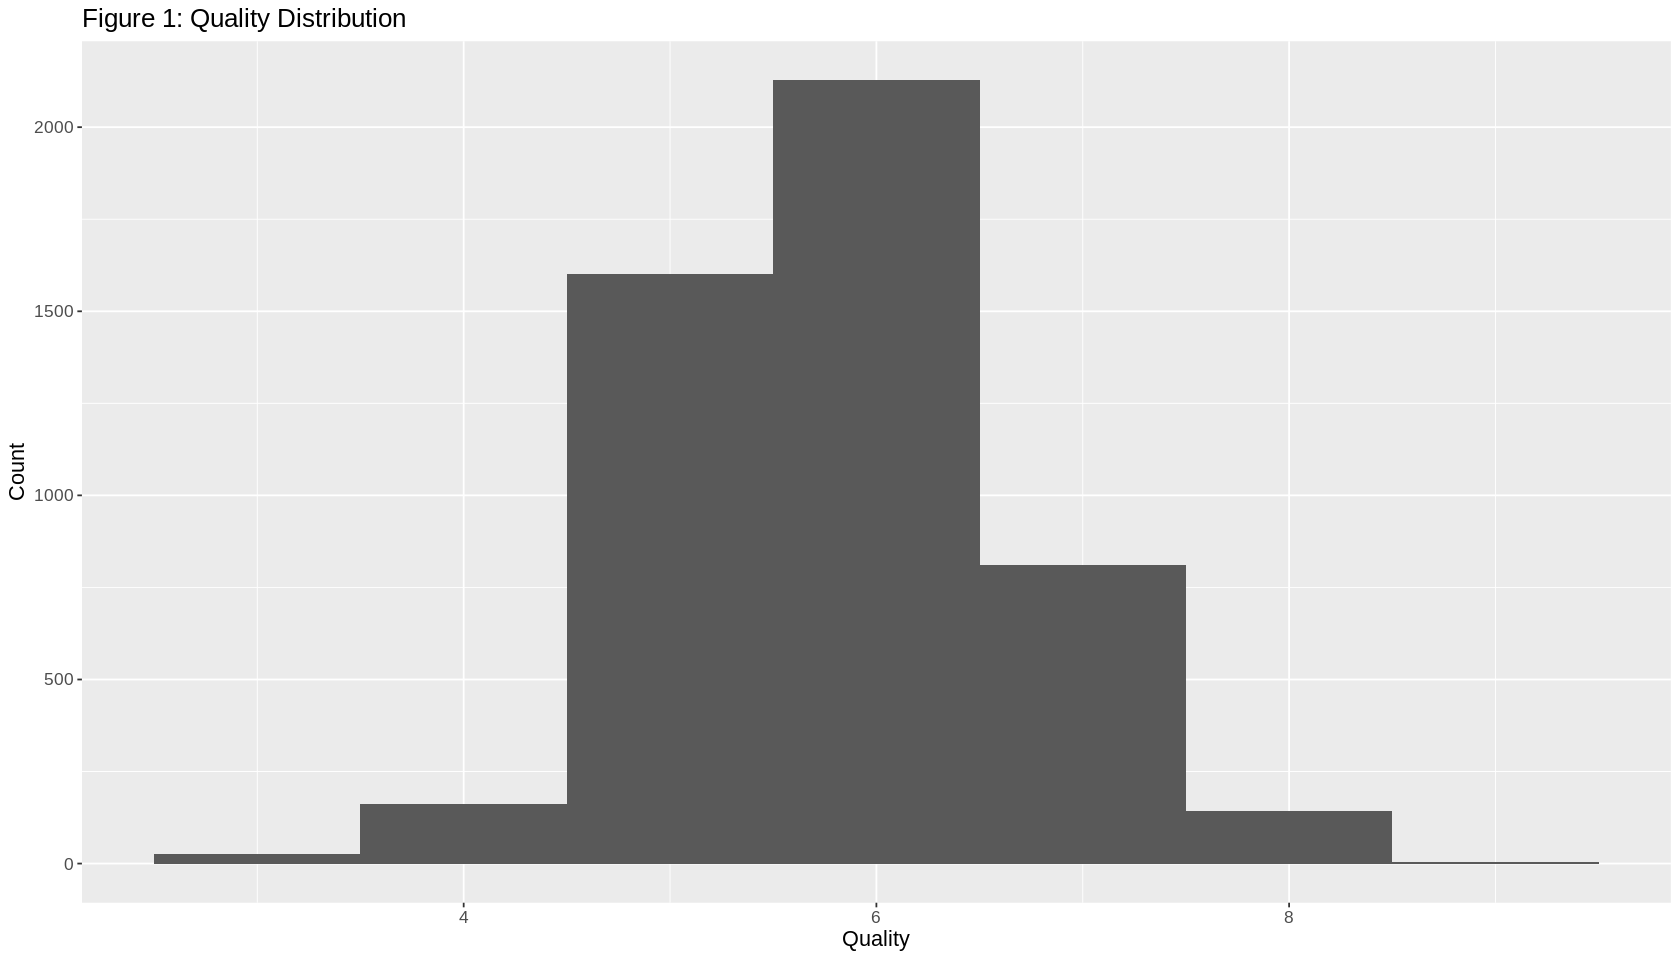

In [116]:
#setting plot size
options(repr.plot.width = 14, repr.plot.height = 8)

#creates plot for the distribution of wine quality
quality_plot <- wine_training %>% ggplot(aes(x = quality)) +
    geom_histogram(binwidth = 1)+
    xlab("Quality")+
    ylab("Count")+
    ggtitle("Figure 1: Quality Distribution") +
    theme(text = element_text(size = 13))
quality_plot

The distribution appears to be unimodal and does not seem to be skewed. This is beneficial for linear regression, which assumes that the data follows a normal distribution.

We provided a summary for the predictors, including the mean, the amount of missing data, etc.

In [10]:
#choosing 2 predictors
predictors <- wine_training %>%
    select(density, alcohol)

#provides summary for the predictors (mean, number of missing data, etc)
summary_data <- predictors %>%
    summary()
summary_data

    density          alcohol    
 Min.   :0.9871   Min.   : 8.0  
 1st Qu.:0.9923   1st Qu.: 9.5  
 Median :0.9949   Median :10.3  
 Mean   :0.9947   Mean   :10.5  
 3rd Qu.:0.9970   3rd Qu.:11.3  
 Max.   :1.0390   Max.   :14.2  

**Table 3: Summary Data for Predictors**

There is no missing data. We can see from the summaries that the mean for density is 0.9947 g/dm<sup>3</sup>, while the mean for alcohol is 10.5%. We created a plot for each predictor to show the predictor's distribution, using the minimum and maximum values for alcohol and density to decide on the binwidth values.

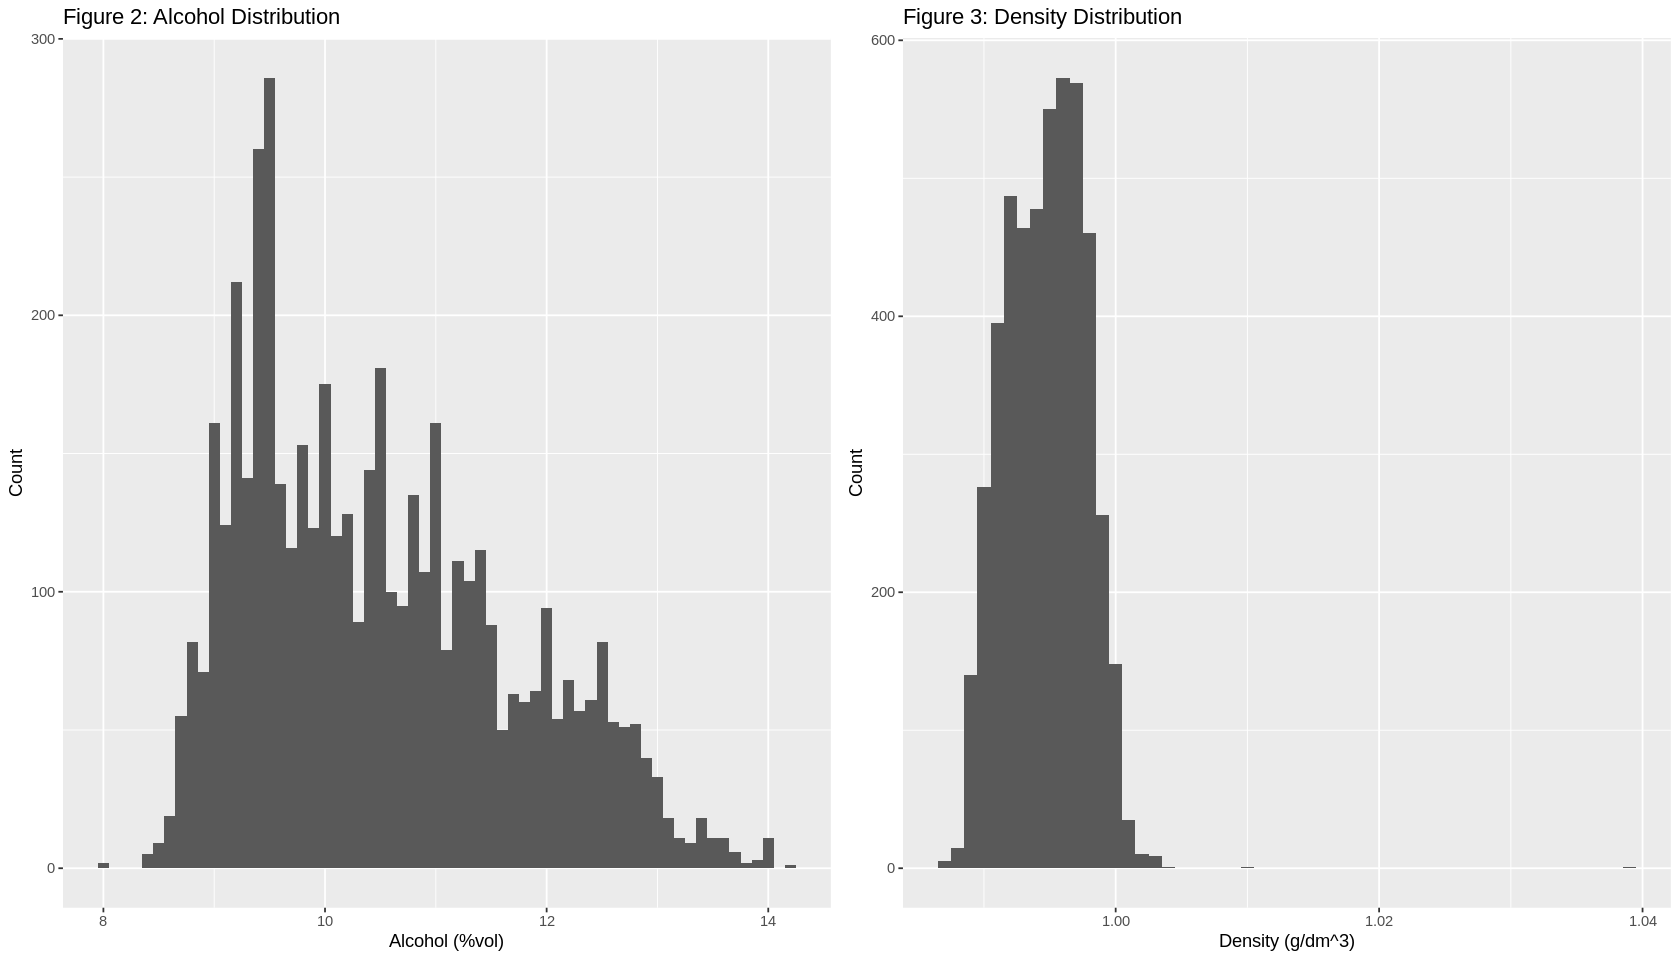

In [114]:
#setting plot size
options(repr.plot.width = 14, repr.plot.height = 8)

#create plot for each predictor and their distribution
density_plot <- predictors %>% ggplot(aes(x = density)) +
    geom_histogram(binwidth = .001)+
    xlab("Density (g/dm^3)")+
    ylab("Count")+
    ggtitle("Figure 3: Density Distribution")

alcohol_plot <- predictors %>% ggplot(aes(x = alcohol)) +
    geom_histogram(binwidth = .1)+
    xlab("Alcohol (%vol)")+
    ylab("Count")+
    ggtitle("Figure 2: Alcohol Distribution")

#create grid of above plots for comparison
predictor_distribution <- plot_grid(alcohol_plot, density_plot)
predictor_distribution

The distributions for both density and the alcohol volume are unimodal, right-skewed, and asymmetric. For linear regression, which assumes data is normally distributed, this may be an issue. However, since k-nearest neighbours regression does not make assumptions about the normality of the data, KNN may be the better option for modelling the relationship between wine quality and the predictors. 

<font size="3">**Methods**</font>

Given that the response variable (wine quality based on subjective sensory data) is quantitative, we will use **regression** for our predictions. To begin our analysis, we have visualized each of the predictor variables as scatter plots with the predictor variable on the x-axis and wine quality on the y-axis.

First, we created scatterplots to assess the relationships between each of the potential predictor variables and wine quality. Meanwhile, we also calculated the correlations between each predictor variable and wine quality.

In [112]:
#create scatterplot of density vs wine quality
density_scatter <- ggplot(wine_training, aes(x = density, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Density (g/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 15)) +
  ggtitle("Figure 5: Relationship Between Density and \n Wine Quality (r = -0.3145)")

#create scatterplot of alcohol vs wine quality
alcohol_scatter <- ggplot(wine_training, aes(x = alcohol, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Alcohol (%vol)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 15)) +
  ggtitle("Figure 4: Relationship Between Alcohol and \n Wine Quality (r = 0.4394)")

#find correlation between density and wine quality
PearsonCorrelation_Density <- cor(wine_training$density, wine_training$quality, method = c("pearson"))

#find correlation between alcohol and wine quality
PearsonCorrelation_Alcohol <- cor(wine_training$alcohol, wine_training$quality, method = c("pearson"))

We then displayed the plots alongside the correlations between the predictors and wine quality.

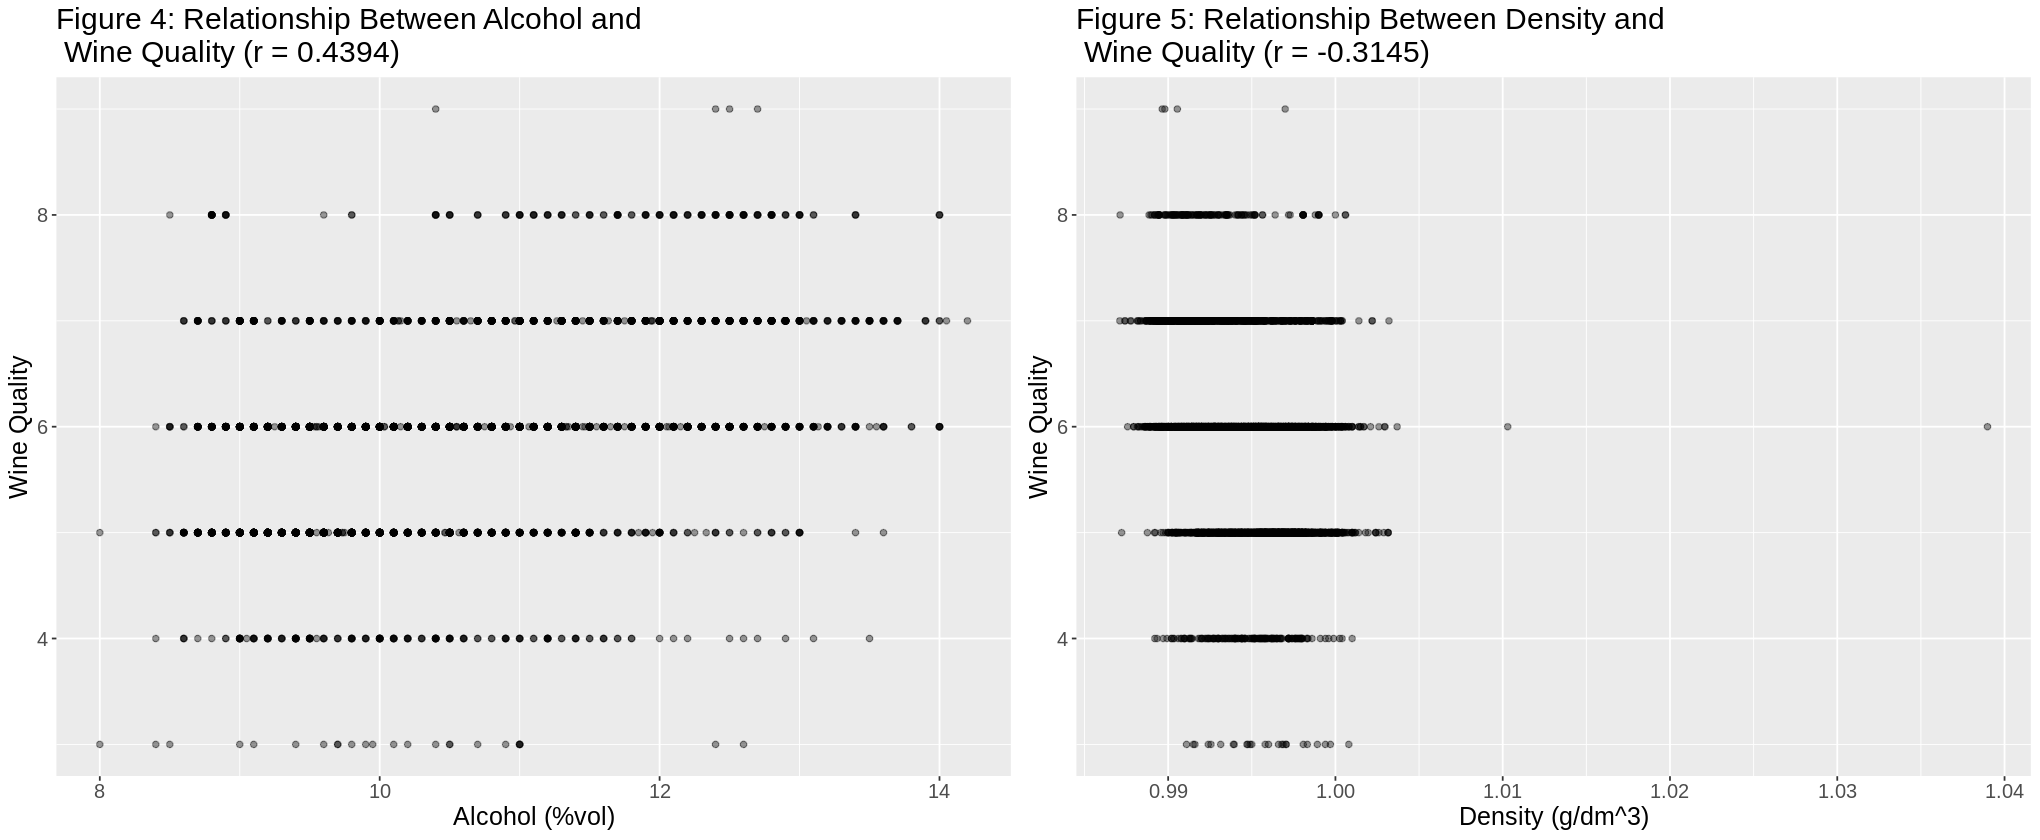

In [113]:
#setting plot size
options(repr.plot.width = 17, repr.plot.height = 7)

#creates grid of predictor variable vs wine quality scatterplots 
grid <- plot_grid(alcohol_scatter, density_scatter, ncol = 2)
grid

We can see that alcohol and density are moderately correlated with wine quality, indicating that they may be good predictors of wine quality. In order to conduct our data analysis, we will first use a multivariate K-nearest neighbors-based approach and perform cross-validation to determine at which value of K the minimum RMSPE occurs. Using this K value, we will re-train our KNN regression model and then make predictions on the testing data set. The RMSPE will let us evaluate our model's accuracy. We will also use a multiple linear regression approach to calculate the line of best fit, including the intercept and slope coefficients, and we will evaluate any outliers. We will again compute the RMSPE. We will identify the model with the least bias (i.e., the lower RMSPE) as the better model.

<font size="3">**K-Nearest Neighbors Regression Analysis**</font>

We used cross-validation to choose our optimal k (number of nearest neighbors). First, we set our model specification by setting the engine as "kknn", setting the mode as "regression," and asking the specification to tune the number of neighbors. We also defined our recipe by setting "quality" as our dependent variable and "alcohol" and "density" as the independent variables.

In [24]:
#set seed
set.seed(2742)

#define the model specification
wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 

#define the recipe
wine_recipe <- recipe(quality ~ density + alcohol, data = wine_split) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())

wine_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

We performed cross validation with 5 folds and defined our workflow by adding our recipe and model specification.

In [25]:
#set seed
set.seed(2742)

#choose the number of folds
wine_vfold <- vfold_cv(wine_training, v = 5, strata = quality)

#define our workflow
wine_workflow <- workflow() %>%
       add_recipe(wine_recipe) %>%
       add_model(wine_spec) 

wine_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We tested 200 values of k to see how the RMSPE varies with different values of k. 

In [26]:
#set seed
set.seed(1765)

#create a tibble
gridvals <- tibble(neighbors = seq(1,200))

#collect metrics
wine_results <- wine_workflow %>%
tune_grid(resamples = wine_vfold, grid = gridvals) %>%
collect_metrics()

#show results
wine_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.9670661,5,0.01539786,Model001
1,rsq,standard,0.1584400,5,0.01126146,Model001
2,rmse,standard,0.8710205,5,0.01722047,Model002
2,rsq,standard,0.1731962,5,0.01453677,Model002
3,rmse,standard,0.8344809,5,0.01663220,Model003
3,rsq,standard,0.1876102,5,0.01339026,Model003
4,rmse,standard,0.8240779,5,0.01624709,Model004
4,rsq,standard,0.1873688,5,0.01514289,Model004
5,rmse,standard,0.8092910,5,0.01515475,Model005


**Table 4: 200 Potential KNN Models**

We found the value of k that gives the lowest RMSPE value (96).

In [27]:
#set seed
set.seed(1598)

#find the row with the minimum RMSPE
wine_min <- wine_results %>%
    filter(.metric == 'rmse') %>%
    arrange(desc(mean, std_err)) %>% 
    slice(200)

#show the row with the number of neighbors that will be our optimal k value
wine_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
96,rmse,standard,0.77152,5,0.01646917,Model096


**Table 5: Model With Lowest RMSPE**

Next, we retrained our model with the training data using k = 96.

In [54]:
#set seed
set.seed(1692)

#set our optimal k value
k_min <- wine_min %>%
         pull(neighbors) 

#set our model specification with our optimal k value
wine_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

#define our workflow using our optimal k value
wine_best_fit <- workflow() %>%
          add_recipe(wine_recipe) %>%
          add_model(wine_best_spec) %>%
          fit(data = wine_training)

We made predictions on the training data to find the RMSE.

In [55]:
#make predictions on the training data
wine_summary_rmse <- wine_best_fit %>%
           predict(wine_training) %>%
           bind_cols(wine_training) %>%
           metrics(truth = quality, estimate = .pred) %>%
           filter(.metric == "rmse") %>%
           pull()
           
#show the regression model's RMSE 
wine_summary_rmse

[1] 0.763101

Our model's RMSE is 0.763100963770743; the RMSE reflects how well our model’s predictions on the training data align with the actual “quality” values in the training dataset. 

Then, we made predictions on the test data and filtered for the RMSPE.

In [51]:
#make predictions on the test data
wine_summary_rmspe <- wine_best_fit %>%
           predict(wine_testing) %>%
           bind_cols(wine_testing) %>%
           metrics(truth = quality, estimate = .pred) %>%
           filter(.metric == "rmse") %>%
           pull()
           
#show the regression model's RMSPE 
wine_summary_rmspe

[1] 0.7639886

Our model's RMSPE value is 0.763988632961559; the RMSPE reflects how well our model’s predictions on the testing data align with the actual “quality” values in the testing dataset. We thus expect the error in prediction of wine quality to be 0.763988632961559. Our RMSE and RMSPE values are quite similar, indicating that the testing and training dataset do not differ greatly. 

We then used the predictions (without filtering for the RMSPE) made on the test data to make graphs of the predictions of wine quality.

In [37]:
#setting the seed
set.seed(1692)

#view the predictions made on the test set
wine_summary_results <- wine_best_fit %>%
           predict(wine_testing) %>%
           bind_cols(wine_testing)

We created two plots, one depicting the predicted values of wine quality (as predicted by alcohol volume) on top of the alcohol volume values from the testing data and the other depicting the predicted values of wine quality (as predicted by density) on top of the density values from the testing data. 

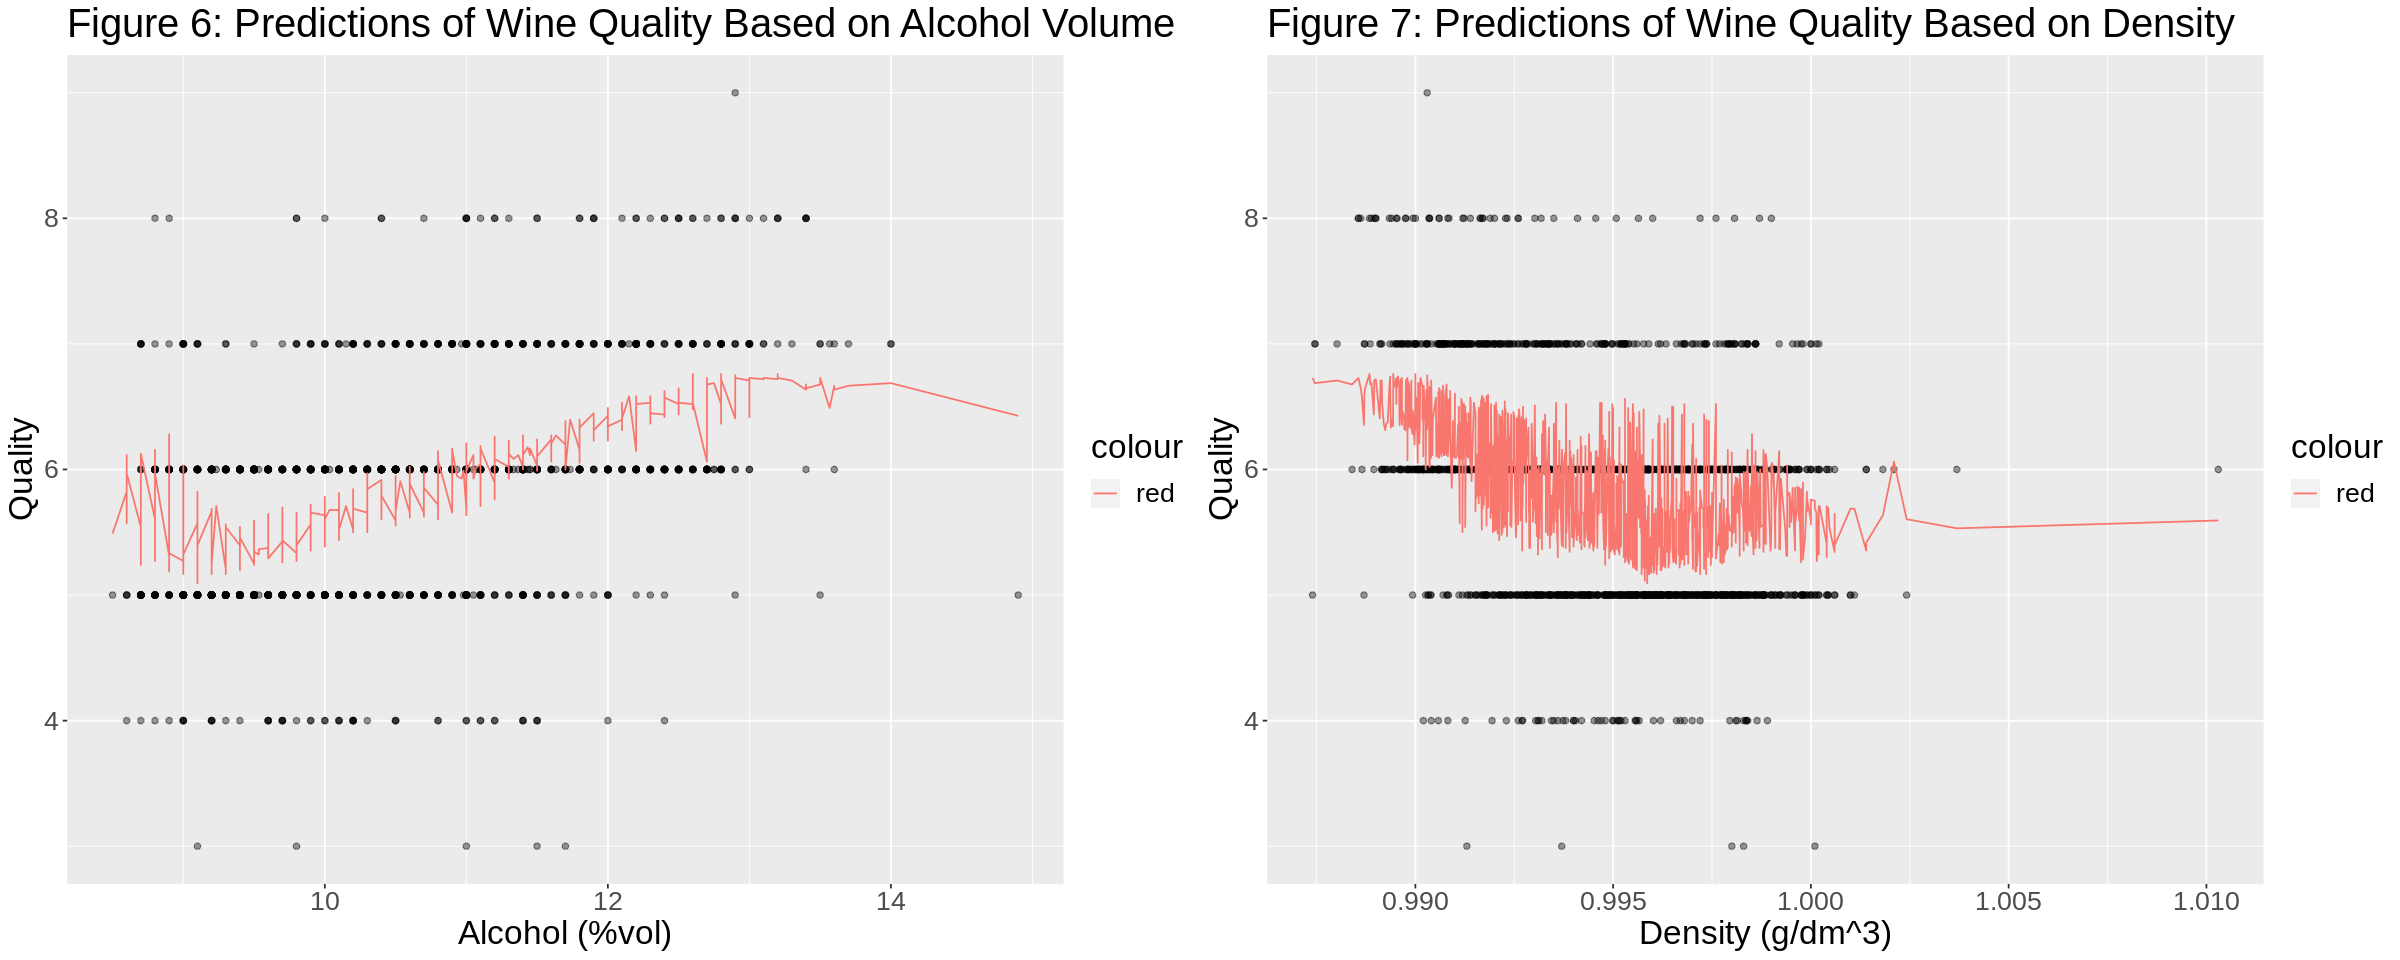

In [117]:
#create a plot showing the predicted values of the quality on top of alcohol volume values from the test set
wine_knn_plot_final_alcohol <- ggplot(wine_testing, aes(x = alcohol, y = quality)) +
geom_point(alpha = 0.4) +
geom_line(data = wine_summary_results,
          mapping = aes(x = alcohol, y = .pred,
          color = "red")) +
xlab("Alcohol (%vol)") +
ylab("Quality") +
ggtitle("Figure 6: Predictions of Wine Quality Based on Alcohol Volume") +
theme(text = element_text(size = 20))

#create a plot showing the predicted values of the quality on top of density values from the test set
wine_knn_plot_final_density <- ggplot(wine_testing, aes(x = density, y = quality)) +
geom_point(alpha = 0.4) +
geom_line(data = wine_summary_results,
          mapping = aes(x = density, y = .pred,
          color = "red")) +
xlab("Density (g/dm^3)") +
ylab("Quality") +
ggtitle("Figure 7: Predictions of Wine Quality Based on Density") +
theme(text = element_text(size = 20))

#setting plot size
options(repr.plot.width = 20, repr.plot.height = 8)

#create grid of above plots for comparison
knn_prediction_plots <- plot_grid(wine_knn_plot_final_alcohol, wine_knn_plot_final_density)
knn_prediction_plots 

As can been seen in the graphs above, the model predictions of the test values follow the general trend of the actual test values, indicating that our model is of good quality.

<font size="3">**Linear Regression Analysis**</font>

First, we loaded the GGally package from the library to be able to use the ggpairs function and create a ggpairs scatterplot of all of the columns we are interested in including in our multivariable linear regression model for exploring the relationships between the different variables.

In [44]:
#load the GGally package to be able to use the ggpairs function
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



We created a ggpairs scatterplot of all of the columns we are interested in including in our multivariable linear regression model to explore the relationships between the different variables.

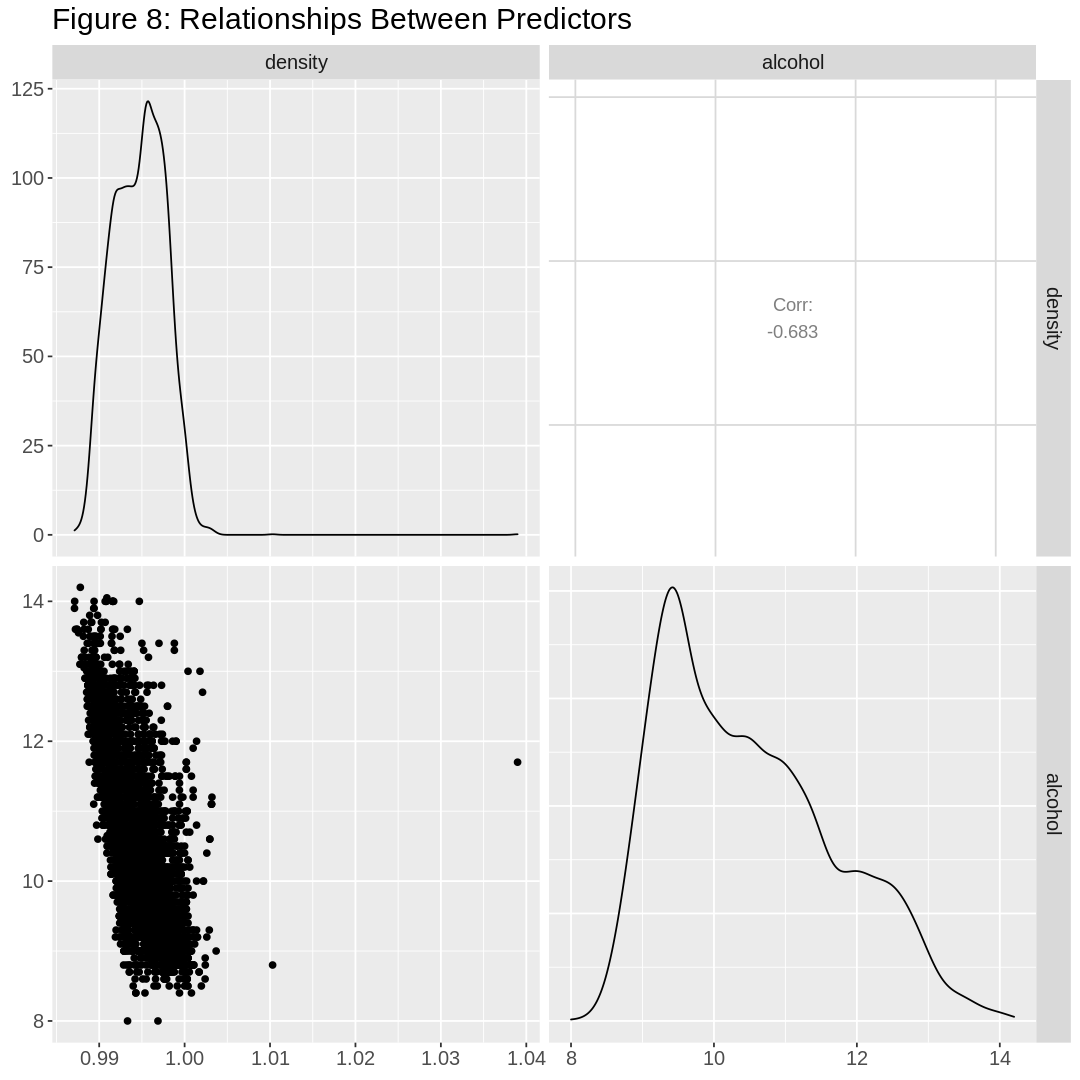

In [120]:
#create a ggpairs plot to understand the relationships between all of the variables
options(repr.plot.width = 9, repr.plot.height = 9)
ggpairs_plot <- wine_training %>%
ggpairs(c(8, 11)) +
ggtitle("Figure 8: Relationships Between Predictors") +
theme(text = element_text(size = 15))
ggpairs_plot

We can see that density and alcohol are moderately correlated, indicating multicollinearity, which may negatively impact the performance of both our linear and k-nearest neighbors regression models.

We then created the model specification for our multivariable linear regression model by using the linear_reg model specification with the "lm" engine. We used set_mode("regression") in the model specification to indicate that this is a regression problem.

In [45]:
#set seed
set.seed(1242)

#create the model specification for linear regression
mlm_spec <- linear_reg() %>%
set_engine("lm") %>%
set_mode("regression")
mlm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


Next, we created the recipe for our multivariable linear regression analysis by specifying that we want to predict our target variable, the quality of the wine, based on the density and alcohol. We also initialized this recipe for the training dataset.

In [87]:
#create the recipe for linear regression
mlm_recipe <- recipe(quality ~ alcohol + density, data = wine_training)
mlm_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

In this next step, we added the model and recipe we created for multivariable linear regression in a workflow using the add_recipe and add_model functions, and we used the fit function to run the whole workflow on our training dataset.

In [88]:
#set seed
set.seed(1281)

#add the model and recipe for linear regression in a workflow and run the workflow on the training data
mlm_fit <- workflow() %>%
add_recipe(mlm_recipe) %>%
add_model(mlm_spec) %>%
fit(data = wine_training)
mlm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)      alcohol      density  
     2.1972       0.3215       0.2469  


Looking at the slopes of each of the predictors and the value of the y-interecept, we then created a mathematical equation for our prediction model.

$ quality = 2.1972 + 0.2469 * density + 0.3215 * alcohol $

Then, we calculated the RMSE to assess the goodness of fit on mlm_fit, which reflects how well the model predicts on the training data used to fit the model.

In [92]:
#set seed
set.seed(1302)

#find how well the model makes predictions on the training data by calculating the RMSE
mlm_rmse <- mlm_fit %>%
predict(wine_training) %>%
bind_cols(wine_training) %>%
metrics(truth = quality, estimate = .pred) %>%
filter(.metric == "rmse") %>%
select(.estimate) %>%
pull()
mlm_rmse

[1] 0.7852694

Our model's RMSE value is 0.785269415476195, indicating that the error in prediction of wine quality (on the training dataset) is 0.785269415476195.

Finally, we assessed the quality of our model by making predictions on the testing dataset using our multivariable linear regression fit object and calculating the RMSPE value by filtering for the rmse row and selecting the .estimate column to get the value of the RMSPE.

In [93]:
#set seed
set.seed(1682)

#find how well the model makes predictions on the testing data by calculating RMSPE
mlm_rmspe <- mlm_fit %>%
predict(wine_testing) %>%
bind_cols(wine_testing) %>%
metrics(truth = quality, estimate = .pred) %>%
filter(.metric == "rmse") %>%
select(.estimate) %>%
pull()
mlm_rmspe

[1] 0.7732482

The RMSE and RMSPE values are quite similar and are both rather low, which indicates that the model seems to generalize well on data that it has never seen before.

We then created two linear regression plots for the quality predictions made on the test set, one depicting the predicted values of the quality obtained for the test set on top of the alcohol volume values from the testing data and the other depicting the predicted values of the quality obtained for the test set on top of the density values from the testing data. 

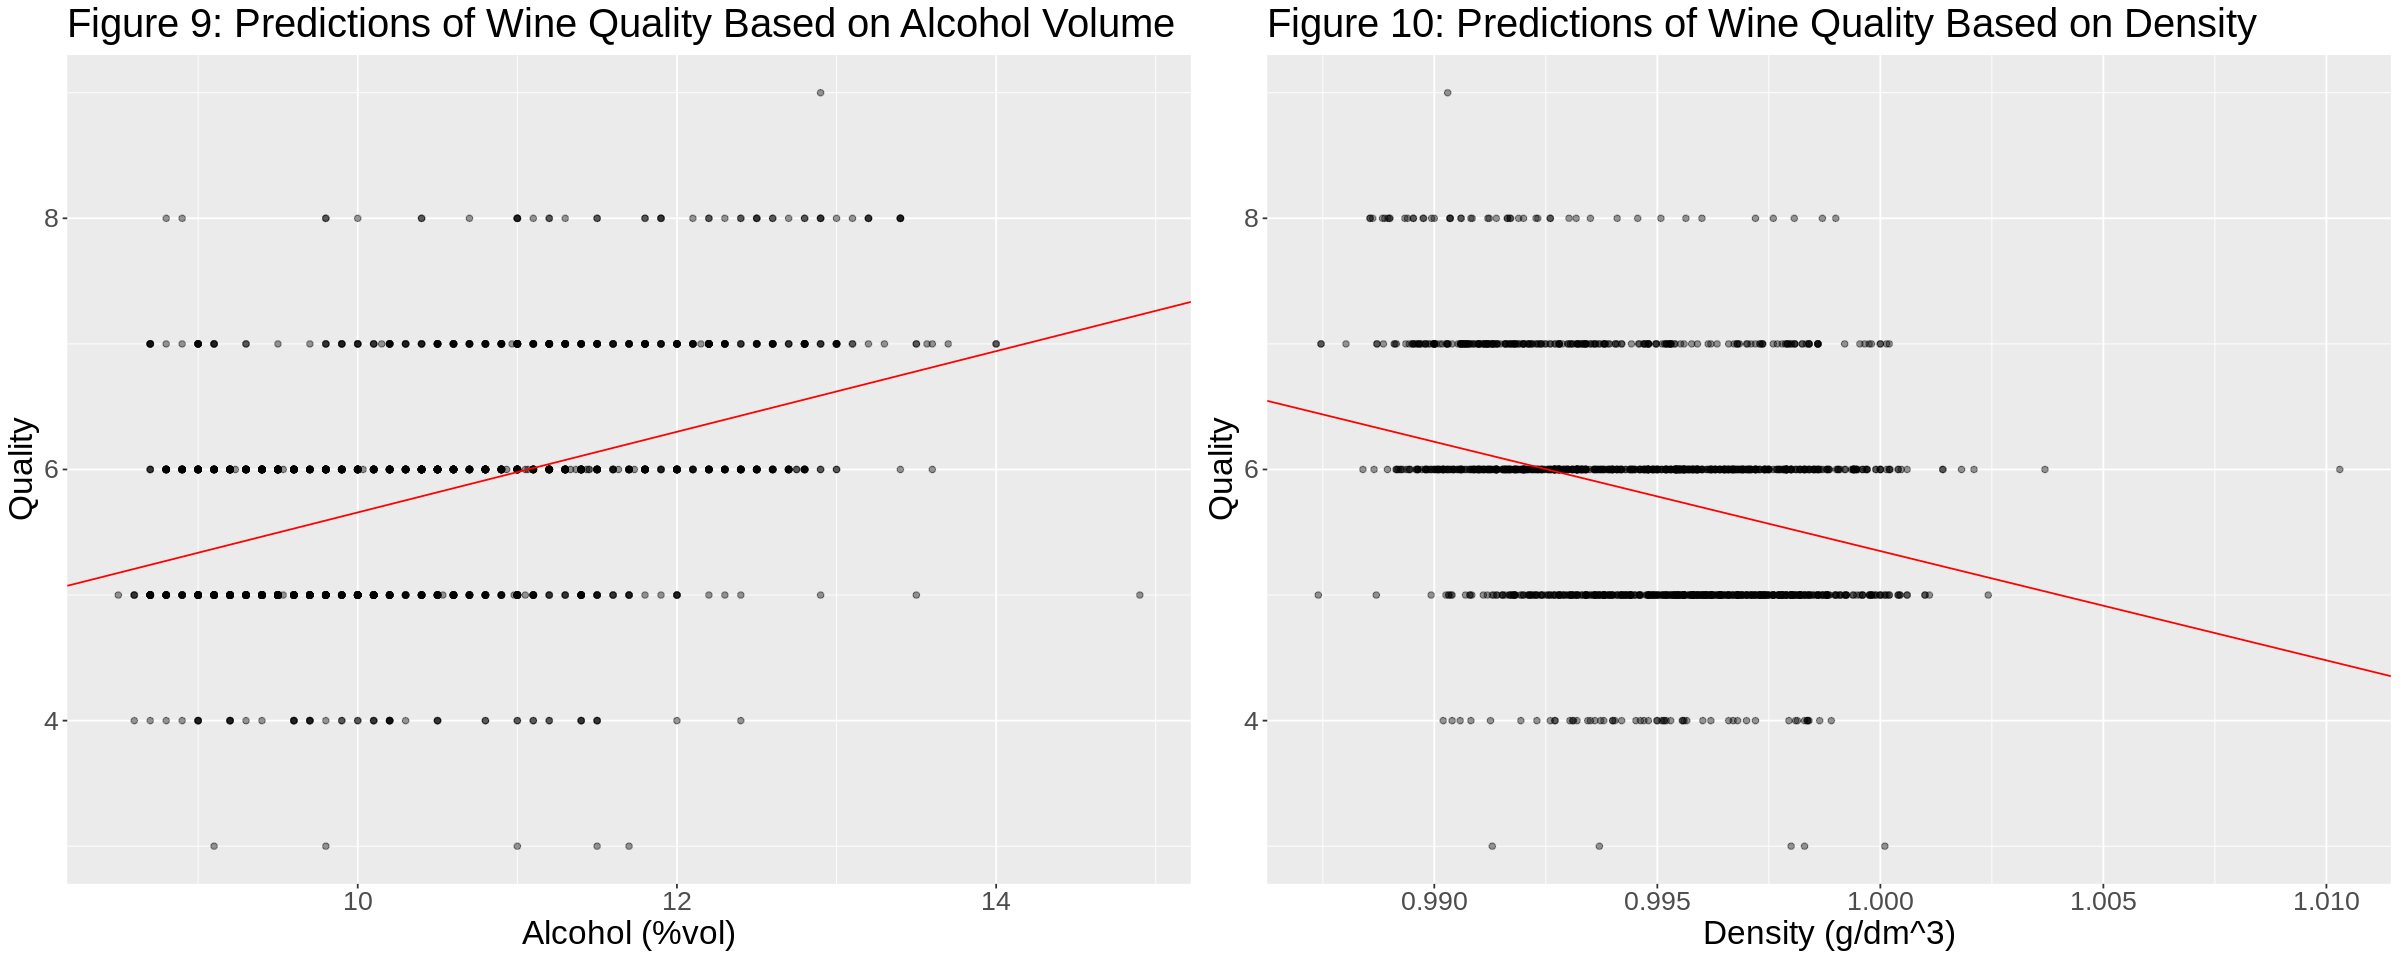

In [121]:
#create a linear regression plot showing the predicted values for alcohol volume
wine_lm_plot_final_alcohol <- ggplot(wine_testing, aes(x = alcohol, y = quality)) +
geom_point(alpha = 0.4) +
xlab("Alcohol (%vol)") +
ylab("Quality") +
geom_abline(aes(intercept = 2.4472, slope = 0.3211), 
            color = "red") +
ggtitle("Figure 9: Predictions of Wine Quality Based on Alcohol Volume") +
theme(text = element_text(size = 20))

#create a linear regression plot showing the predicted values for density
wine_lm_plot_final_density <- ggplot(wine_testing, aes(x = density, y = quality)) +
geom_point(alpha = 0.4) +
xlab("Density (g/dm^3)") +
ylab("Quality") +
geom_abline(aes(intercept = 92.38, slope = -87.03), 
            color = "red") +
ggtitle("Figure 10: Predictions of Wine Quality Based on Density") +
theme(text = element_text(size = 20))

#setting plot size
options(repr.plot.width = 20, repr.plot.height = 8)

#create grid of above plots for comparison
lm_prediction_plots <- plot_grid(wine_lm_plot_final_alcohol , wine_lm_plot_final_density)
lm_prediction_plots 

As can be seen in the graphs above, both predictors' relationships with quality are fairly but not entirely linear; the k-nearest neighbors model may help account for some of the slight curves in the data. 

<font size="3">**Summary & Significance**</font>

Our RMSPE from the KNN regression analysis was 0.7639886, whereas it was 0.7732481 in the linear regression analysis. RMSPE measures how well the model predicts on data it was not trained with. The model with a smaller RMSPE does a better job of predicting on the test dataset. Thus, we chose KNN as our preferred model for the wine quality data. Earlier in the report, we predicted that KNN regression may be the better option due to the skewness of the alcohol and density data. Therefore, our results were aligned with our expectations. These findings could help simplify the traditional wine certification process. Rather than using taste testers, wine makers could use KNN regression to predict the quality of their wine based on factors such as alcohol and density. Other variables that may effect perceived wine quality, such as sugar content, could also be explored. This type of analysis could also be applied to other liquids. 

<font size="3">**Bibliography**</font>

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553. https://doi.org/10.1016/j.dss.2009.05.016

ETS Laboratories. (n.d.). *Density.* ETS. https://www.etslabs.com/analyses/DEN

Nebot, À., Mugica, F., & Escobet, A. (2015). Modeling Wine Preferences from Physicochemical Properties using Fuzzy Techniques. SIMULTECH 2015, 501-507. doi:10.5520/0005551905010507 

Timbers, T., Campbell, T., Lee, M. (2021). *Data Science: A First Introduction.* Github. https://ubc-dsci.github.io/introduction-to-datascience/

Wiens, D. (2017, December 27). *Wine Alcohol Content: How It Changes What You Taste.* Orange Coast Winery. https://www.orangecoastwinery.com/blog/Wine-Alcohol-Content--How-it-Changes-What-You-Taste